In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
# Use stratify=y to ensure proportion of classes is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# Define a range of max_depth values to test
max_depths = range(1, 15) # Test depths from 1 to 14

# Store error rates
train_errors = []
test_errors = []

# --- Train models and evaluate ---
print("Calculating errors for different max_depth values...")
for depth in max_depths:
    # Create a Decision Tree Classifier with the current max_depth
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the model
    dt_classifier.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = dt_classifier.predict(X_train)
    # Predict on test data
    y_test_pred = dt_classifier.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate error rate (1 - accuracy) and store it
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

    # print(f"Max Depth: {depth}, Train Error: {1 - train_accuracy:.4f}, Test Error: {1 - test_accuracy:.4f}")


Calculating errors for different max_depth values...


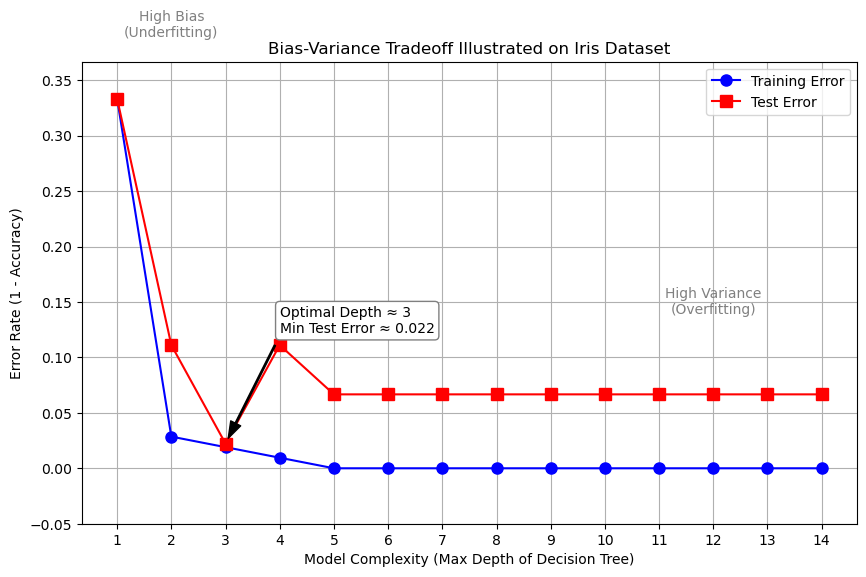

In [4]:
# --- Plotting the results ---
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, 'o-', label='Training Error', color='blue', markersize=8)
plt.plot(max_depths, test_errors, 's-', label='Test Error', color='red', markersize=8)

# Add labels and title
plt.xlabel('Model Complexity (Max Depth of Decision Tree)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Bias-Variance Tradeoff Illustrated on Iris Dataset')
plt.legend()
plt.grid(True)
plt.xticks(max_depths) # Ensure each depth value is marked on x-axis
plt.ylim(bottom=-0.05, top=max(max(train_errors), max(test_errors)) * 1.1) # Adjust y-axis limits

# Annotate key points (optional, but helpful)
min_test_error_idx = np.argmin(test_errors)
min_test_error_depth = max_depths[min_test_error_idx]
min_test_error_val = test_errors[min_test_error_idx]

plt.annotate(f'Optimal Depth ≈ {min_test_error_depth}\nMin Test Error ≈ {min_test_error_val:.3f}',
             xy=(min_test_error_depth, min_test_error_val),
             xytext=(min_test_error_depth + 1, min_test_error_val + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

plt.text(max_depths[1], 0.4, 'High Bias\n(Underfitting)', ha='center', va='center', color='gray')
plt.text(max_depths[-3], 0.15, 'High Variance\n(Overfitting)', ha='center', va='center', color='gray')


# Display the plot
plt.show()

In [5]:
# Print the minimum test error found
print(f"\nMinimum test error ({min_test_error_val:.4f}) found at max_depth = {min_test_error_depth}")


Minimum test error (0.0222) found at max_depth = 3
